### Import libraries

In [116]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [117]:
def load_csvs_from_folder(folder_path):
    # Find all CSV files in the folder
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    # Read and concatenate all CSVs
    df_list = []
    for f in csv_files:
        df = pd.read_csv(f)
        file_name = os.path.basename(f)

        text = f.split("_")
        train_steps = text[7]
        tasksteps = text[8]
        transferstrat = (
            f"{train_steps}_{file_name.split('_transferstrat_')[1].split('_lr')[0]}"
        )
        df["transferstrat"] = transferstrat
        df_list.append(df)

    combined_df = pd.concat(df_list, ignore_index=True)

    return combined_df

In [118]:
folder_path = "Results_model"
df = load_csvs_from_folder(folder_path)

In [119]:
df_test = df[df["set"] == "test"]

In [ ]:
grouped_df_test = (
    df_test.groupby(by=["exchange", "transferstrat"])
    .mean(numeric_only=True)
    .reset_index()
)
grouped_df_test

,exchange,transferstrat,SR,CR,MDD,ANN_RET,ANN_VOL,SortR,DownRisk,VaR,TailR,Skew,Kurt
0,Americas_IBOV,1000_global_linear_linear,-0.074534,-0.079178,-0.462593,-0.045409,0.292267,-0.085647,0.206350,-0.030609,1.022895,0.002556,5.429029
1,Americas_IBOV,1000_global_linear_lstm,0.306446,0.296239,-0.119765,0.019203,0.076732,0.486330,0.052914,-0.006412,1.096096,-0.069986,17.126983
2,Americas_IBOV,1000_global_lstm_linear,0.109698,0.227985,-0.190693,0.000638,0.114664,0.245558,0.079002,-0.011772,0.974202,0.460359,11.788830
3,Americas_IBOV,1000_global_lstm_lstm,0.047518,0.049693,-0.201754,-0.007243,0.136217,0.084558,0.095271,-0.014388,1.000748,0.049279,5.190022
4,Americas_IBOV,1000_no_transfer_linear,0.122657,0.142232,-0.006757,0.000543,0.003793,0.215985,0.002631,-0.000317,1.027636,-0.048404,25.727337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,MEA_TOP40,500_global_linear_lstm,-0.019215,0.062002,-0.144486,-0.005993,0.077457,0.020583,0.055477,-0.007287,0.980387,-0.201169,21.125145
1388,MEA_TOP40,500_global_lstm_linear,0.421034,0.441096,-0.139151,0.032766,0.092622,0.670339,0.063715,-0.008984,1.046757,0.230185,16.462490
1389,MEA_TOP40,500_global_lstm_lstm,0.285554,0.234425,-0.264766,0.027205,0.186220,0.442704,0.129433,-0.018361,1.030214,-0.044596,16.720190
1390,MEA_TOP40,500_no_transfer_linear,0.348245,0.345028,-0.010141,0.001616,0.006031,0.589944,0.004288,-0.000432,1.082447,-0.202025,39.590738


### Chart 2

In [121]:
chart_2 = grouped_df_test[["exchange", "transferstrat", "SR"]]
chart_2

,exchange,transferstrat,SR
0,Americas_IBOV,1000_global_linear_linear,-0.074534
1,Americas_IBOV,1000_global_linear_lstm,0.306446
2,Americas_IBOV,1000_global_lstm_linear,0.109698
3,Americas_IBOV,1000_global_lstm_lstm,0.047518
4,Americas_IBOV,1000_no_transfer_linear,0.122657
...,...,...,...
1387,MEA_TOP40,500_global_linear_lstm,-0.019215
1388,MEA_TOP40,500_global_lstm_linear,0.421034
1389,MEA_TOP40,500_global_lstm_lstm,0.285554
1390,MEA_TOP40,500_no_transfer_linear,0.348245


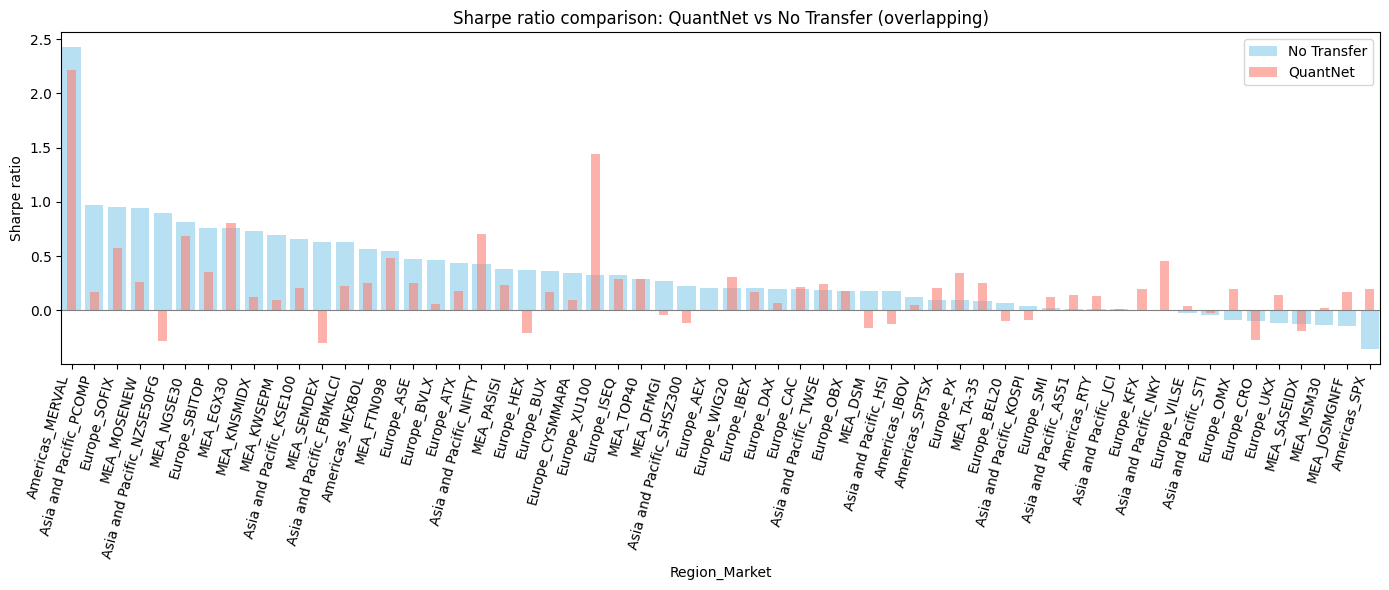

In [ ]:
chart_2 = grouped_df_test[["exchange", "transferstrat", "SR"]]

chart_2 = chart_2.copy()

chart_2["transferstrat"] = chart_2["transferstrat"].replace(
    {"1000_global_lstm_lstm": "QuantNet", "1000_no_transfer_linear": "No Transfer"}
)

# Pivot to wide format
pivot_df = chart_2.pivot(index="exchange", columns="transferstrat", values="SR")

# Sort by "No Transfer"
pivot_df = pivot_df.sort_values(by="No Transfer", ascending=False)

# Plot overlapping bars
fig, ax = plt.subplots(figsize=(14, 6))

pivot_df["No Transfer"].plot(
    kind="bar", color="skyblue", alpha=0.6, width=0.8, ax=ax, label="No Transfer"
)

pivot_df["QuantNet"].plot(
    kind="bar",
    color="salmon",
    alpha=0.6,
    width=0.4,  # thinner bar so both visible
    ax=ax,
    label="QuantNet",
)

# Labels and formatting
plt.ylabel("Sharpe ratio")
plt.xlabel("Region_Market")
plt.title("Sharpe ratio comparison: QuantNet vs No Transfer (overlapping)")
plt.axhline(0, color="gray", linewidth=0.8)

plt.xticks(rotation=75, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

In [123]:
fig.savefig("chart_2.png")

### Chart 3

In [126]:
chart_3 = grouped_df_test[["exchange", "transferstrat", "SR", "CR"]]
chart_3

,exchange,transferstrat,SR,CR
0,Americas_IBOV,1000_global_linear_linear,-0.074534,-0.079178
1,Americas_IBOV,1000_global_linear_lstm,0.306446,0.296239
2,Americas_IBOV,1000_global_lstm_linear,0.109698,0.227985
3,Americas_IBOV,1000_global_lstm_lstm,0.047518,0.049693
4,Americas_IBOV,1000_no_transfer_linear,0.122657,0.142232
...,...,...,...,...
1387,MEA_TOP40,500_global_linear_lstm,-0.019215,0.062002
1388,MEA_TOP40,500_global_lstm_linear,0.421034,0.441096
1389,MEA_TOP40,500_global_lstm_lstm,0.285554,0.234425
1390,MEA_TOP40,500_no_transfer_linear,0.348245,0.345028


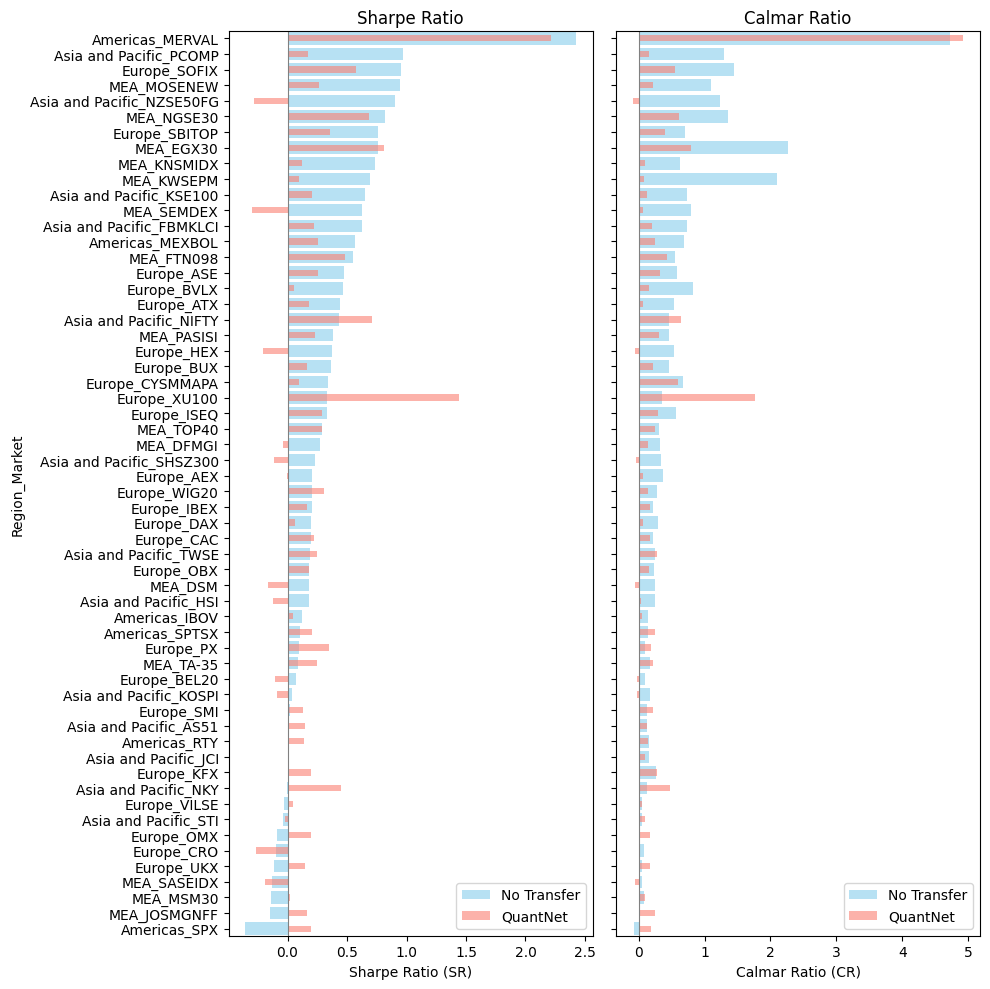

In [137]:
import matplotlib.pyplot as plt

# Take needed columns
chart_3 = grouped_df_test[["exchange", "transferstrat", "SR", "CR"]].copy()

# Replace strategy names
chart_3["transferstrat"] = chart_3["transferstrat"].replace(
    {"1000_global_lstm_lstm": "QuantNet", "1000_no_transfer_linear": "No Transfer"}
)

# Pivot for SR and CR
pivot_SR = chart_3.pivot(index="exchange", columns="transferstrat", values="SR")
pivot_CR = chart_3.pivot(index="exchange", columns="transferstrat", values="CR")

# Sort by SR (No Transfer) to keep order consistent
order = pivot_SR.sort_values(by="No Transfer", ascending=True).index
pivot_SR = pivot_SR.loc[order]
pivot_CR = pivot_CR.loc[order]

# Create 2 subplots side by side
fig, axes = plt.subplots(ncols=2, figsize=(10, 10), sharey=True)

# --- Left plot: SR ---
pivot_SR["No Transfer"].plot(
    kind="barh", ax=axes[0], color="skyblue", alpha=0.6, width=0.8, label="No Transfer"
)
pivot_SR["QuantNet"].plot(
    kind="barh", ax=axes[0], color="salmon", alpha=0.6, width=0.4, label="QuantNet"
)
axes[0].set_xlabel("Sharpe Ratio (SR)")
axes[0].set_ylabel("Region_Market")
axes[0].set_title("Sharpe Ratio")
axes[0].axvline(0, color="gray", linewidth=0.8)
axes[0].legend()

# --- Right plot: CR ---
pivot_CR["No Transfer"].plot(
    kind="barh", ax=axes[1], color="skyblue", alpha=0.6, width=0.8, label="No Transfer"
)
pivot_CR["QuantNet"].plot(
    kind="barh", ax=axes[1], color="salmon", alpha=0.6, width=0.4, label="QuantNet"
)
axes[1].set_xlabel("Calmar Ratio (CR)")
axes[1].set_title("Calmar Ratio")
axes[1].axvline(0, color="gray", linewidth=0.8)
axes[1].legend()

plt.tight_layout()
plt.show()

In [138]:
fig.savefig("chart_3.png")

In [ ]:
###